In [52]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Linear Regression
For the given ‘fish_datasets’, perform the following tasks:

### Q1. Plot a bar chart showing the count of individual species?on it?




In [53]:
fd = pd.read_csv('Fish_dataset.csv')
fd

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [54]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [55]:
fd.describe

<bound method NDFrame.describe of     Species  Weight  Length1  Length2  Length3   Height   Width
0     Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1     Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2     Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3     Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4     Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
..      ...     ...      ...      ...      ...      ...     ...
154   Smelt    12.2     11.5     12.2     13.4   2.0904  1.3936
155   Smelt    13.4     11.7     12.4     13.5   2.4300  1.2690
156   Smelt    12.2     12.1     13.0     13.8   2.2770  1.2558
157   Smelt    19.7     13.2     14.3     15.2   2.8728  2.0672
158   Smelt    19.9     13.8     15.0     16.2   2.9322  1.8792

[159 rows x 7 columns]>

In [56]:
fd.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [57]:
fd.value_counts('Species')

Species
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: count, dtype: int64

In [58]:
data = {'Species': ['Perch', 'Bream', 'Roach', 'Pike', 'Smelt', 'Parkki', 'Whitefish'],
        'Count': [56, 35, 20, 17, 14, 11, 6]}
df = pd.DataFrame(data)
df

,Species,Count
0,Perch,56
1,Bream,35
2,Roach,20
3,Pike,17
4,Smelt,14
5,Parkki,11
6,Whitefish,6


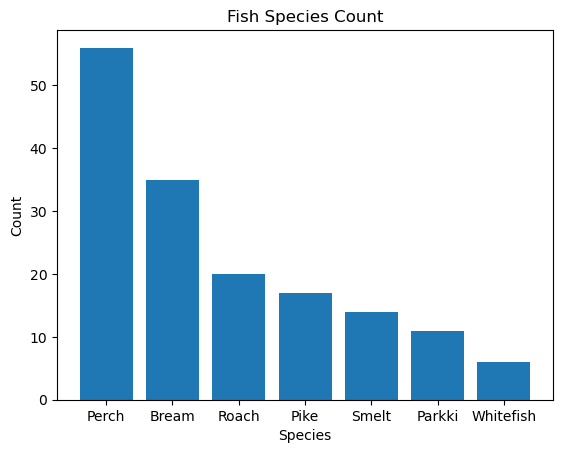

In [59]:
plt.bar(df['Species'], df['Count'])
plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Fish Species Count')
plt.show()

### Q2. Identify outliers and remove if any?

In [60]:
from scipy import stats
z_scores = stats.zscore(df['Count'])
threshold = 3
outlier_indices = (z_scores > threshold) | (z_scores < -threshold)
df_no_outliers = df[~outlier_indices]

print(df_no_outliers)

     Species  Count
0      Perch     56
1      Bream     35
2      Roach     20
3       Pike     17
4      Smelt     14
5     Parkki     11
6  Whitefish      6


### Q3. Build a regression model and print a regression equation?

In [61]:
from sklearn.linear_model import LinearRegression

df_encoded = pd.get_dummies(df, columns=['Species'], drop_first=True)

In [62]:
# Split data into independent (X) and dependent (y) variables
X = df_encoded.drop('Count', axis=1)
y = df_encoded['Count']

In [63]:
# Create a linear regression model
model = LinearRegression()

In [64]:
# Fit the model to the data
model.fit(X, y)

LinearRegression()

In [65]:
# Print the regression equation coefficients
coefficients = model.coef_
coefficients

array([-24.,  21., -18., -15., -21., -29.])

In [66]:
intercept = model.intercept_
intercept

34.99999999999997

In [67]:
equation = f"Count = {intercept:.2f} "
for i, coef in enumerate(coefficients):
    equation += f" + {coef:.2f} * {X.columns[i]}"
print("Regression Equation:")
print(equation)

Regression Equation:
Count = 35.00  + -24.00 * Species_Parkki + 21.00 * Species_Perch + -18.00 * Species_Pike + -15.00 * Species_Roach + -21.00 * Species_Smelt + -29.00 * Species_Whitefish


### Q4. What is the score of the model?

In [68]:
from sklearn.metrics import r2_score

# Assuming you have already trained the model
y_pred = model.predict(X)

# Calculate R-squared score
r2 = r2_score(y, y_pred)

print(f"R-squared Score: {r2:.2f}")


R-squared Score: 1.00


### Q5. Compare real and predicted weights and give a conclusion statement based on it?

In [69]:
# Create a DataFrame with actual and predicted counts
comparison_df = pd.DataFrame({'Actual': y, 'Predicted': y_pred})

# Display the comparison DataFrame
print(comparison_df)


   Actual  Predicted
0      56       56.0
1      35       35.0
2      20       20.0
3      17       17.0
4      14       14.0
5      11       11.0
6       6        6.0


In [71]:
from sklearn.preprocessing import StandardScaler
# define min max scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(X)

In [72]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(scaled,y,test_size=0.2,random_state=40)

In [73]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
Reg_predict=reg.predict(X_test)
Reg_predict_train = reg.predict(X_train)

In [74]:
#multiple regression
from sklearn import metrics
print("R score",metrics.r2_score(y_test,Reg_predict))
print("R score", metrics.r2_score(y_train, Reg_predict_train))
print("MSE = ", metrics.mean_squared_error(y_test,Reg_predict))

R score -0.0011111111111108407
R score 1.0
MSE =  144.15999999999997


In [76]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

Ridge()

In [77]:
ridge_reg.score(X_test, y_test)

-0.0011111111111110628

In [78]:
ridge_reg.score(X_train, y_train)

0.988099173553719

In [79]:
from sklearn.linear_model import ElasticNet
en_reg = ElasticNet()
en_reg.fit(X_train, y_train)

ElasticNet()

In [80]:
en_reg.score(X_test, y_test)

-0.031112845076946893

In [81]:
en_reg.score(X_train, y_train)

0.9301707992731099

In [82]:
#Simple Regression
x = fd['Width'].values.reshape(-1,1)
y = fd['Weight']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=40)

from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_train, y_train)
model_predict=model.predict(x_test)
model_predict_train = model.predict(x_train)

from sklearn import metrics
print("R score",metrics.r2_score(y_test,model_predict))
print("R score", metrics.r2_score(y_train, model_predict_train))

R score 0.7050488612148351
R score 0.8122065238415205
